#### Transforming the x values is appropriate when non-linearity is the only problem - INE are met, but sometimes we need to correct the non-linearity before INE check; also, transformation can make INE not satisfied

#### https://online.stat.psu.edu/stat501/lesson/9

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
from matplotlib import pyplot as plt
filedir = 'STAT501_Lesson09'
os.listdir(filedir)

['bluegills.txt',
 'hospital.txt',
 'yield.txt',
 'wordrecall.txt',
 'shortleaf.txt',
 'odor.txt',
 'allswallows.txt',
 'mammgest.txt']

In [2]:
df = pd.read_table(os.path.join(filedir, 'wordrecall.txt'), encoding="utf-8")
df

,time,prop
0,1,0.84
1,5,0.71
2,15,0.61
3,30,0.56
4,60,0.54
5,120,0.47
6,240,0.45
7,480,0.38
8,720,0.36
9,1440,0.26


<AxesSubplot:xlabel='time'>

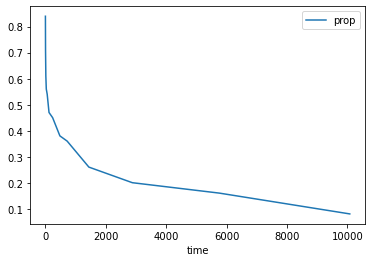

In [3]:
df.plot(x='time',y='prop')

#### log(y) ~ x

<AxesSubplot:xlabel='time'>

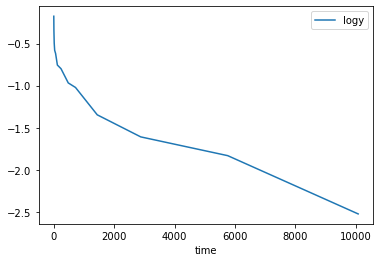

In [4]:
df['logy'] = np.log(df['prop'])
df.plot(x='time',y='logy')

#### y ~ log(x)

<AxesSubplot:xlabel='logx'>

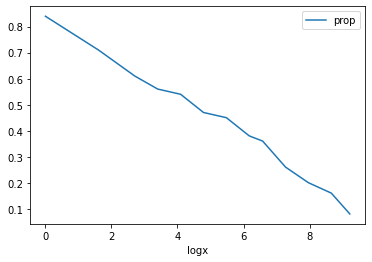

In [5]:
df['logx'] = np.log(df['time'])
df.plot(x='logx',y='prop')

#### log(y) ~ log(x)

<AxesSubplot:xlabel='logx'>

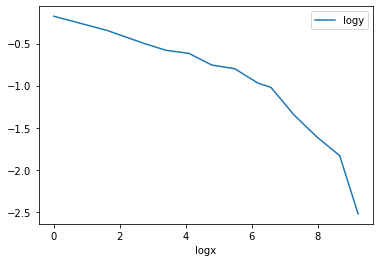

In [6]:
df['logx'] = np.log(df['time'])
df.plot(x='logx',y='logy')

#### First piece of advice: if the primary problem is non-linearity, look at a scatter plot with possible transformations

#### Second piece of advice: if the variances are unequal or error terms are not normal, try a power transformation

#### Third piece of advice: if the error variances are uneuqla, try "stabilizing the variance" by transforming y: sqrt(y) & Poisson regression; arcsine(y) & logistic regression; 1/y

#### 1. Interactions between Quantitative Predictors

We introduced interactions, where we create terms between indicator variables and quantitative predictors to allow for different slopes for different categories

We can also do so between quantitative predictors, introducing some curvature. For example, $y = 3x_1 + 5x_2 + 4x_1 x_2$

**Hierarchy principle**: if your model includes an interaction term e.g. $x_1 x_2$, your model should also include the "main effects" e.g. $x_1$ and $x_2$, whether or not the coefficients for these main effects are significant.

#### 2. Polynomial Regression

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$

Notice: Don't extrapolate

In [7]:
df = pd.read_table(os.path.join(filedir, 'bluegills.txt'), encoding="utf-8")
df

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


In [8]:
df['x_square'] = df['age'] * df['age']
y = df['length']
X = df[['age','x_square']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 length   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           4.96e-27
Time:                        18:44:48   Log-Likelihood:                -295.51
No. Observations:                  78   AIC:                             597.0
Df Residuals:                      75   BIC:                             604.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6224     11.016      1.237      0.220      -8.323      35.568
age           54.0493      6.489      8.330      0.000      41.123      66.976
x_square      -4.7187      0.944     -4.999      0.000      -6.599      -2.838
==============================================================================
Omnibus:                        6.996   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                2.762
Skew:                           0.057   Prob(JB):                        0.251
Kurtosis:                       2.085   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='x', ylabel='y'>

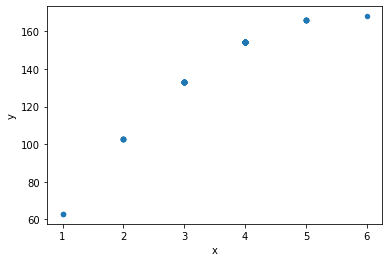

In [9]:
pd.DataFrame({
    'x':df['age'],
    'y':model.predict(X)
}).plot.scatter(x='x',y='y')

In [10]:
y = df['length']
X = df[['age']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 length   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.31e-23
Time:                        18:44:48   Log-Likelihood:                -306.73
No. Observations:                  78   AIC:                             617.5
Df Residuals:                      76   BIC:                             622.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6490      5.755     10.887      0.000      51.188      74.110
age           22.3123      1.537     14.514      0.000      19.251      25.374
==============================================================================
Omnibus:                        4.087   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.372
Skew:                          -0.191   Prob(JB):                        0.305
Kurtosis:                       2.236   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""